In [1]:
# Librairie pour la manipulation de DataFrames
import pandas as pd
import os
from os.path import isfile, join
from fnmatch import fnmatch
# Librairie Graphiques
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
#Librairie de manipulation d'expression régulière
import regex as re

#NEW
# Affiche le graphique des trajectoires
def aff_t(df_p, titre, show):
    #titre = path_to_title(path)
    #df_p = get_dirty_csv("Position", scene, PATH)
    fig = px.line(df_p, x='PositionX_Relative', y="PositionY_Relative", color="TrackID",title=titre, height=600, width = 600)
    fig.update_yaxes( scaleanchor = "x", scaleratio = 1,)
    fig.update_yaxes(range=[-150, 150], linecolor='black')
    fig.update_xaxes(range=[-150, 150], linecolor='black')
    #############################################################
    # TOUKA Titre des axes juste ici
    #False True
    #############################################################
    fig.update_layout( xaxis_title="X", yaxis_title="Y", legend_title="Legend Title", showlegend=show,plot_bgcolor='white',legend=dict( yanchor="bottom", xanchor="center"))
    fig.write_image(dossier_reception_graph + titre + ".png")
    fig.show()

def chemin(p):
    p.replace("\\","/")
    return p
#NEW
# Renvoie la liste qui contient tous les chemins des fichiers qui contiennent name dans leur nom, du dossier ayant pour chemin path
def find_all_f_with(name, path):
    l = [os.path.join(root, file_name) for root, dirs, files in os.walk(path) for file_name in files if name in file_name]
    return l
#NEW to change
def get_all_csv_pos_rela(path):
    l_folder = get_folder_list(path)
    l = find_all_f_with("Position_Relative", path)
    l_df = [pd.read_csv(x) for x in l]
    return l_df, l
#OLD
def get_folder_list(path):
    l = next(os.walk(path))[1]
    return l
def dead_cells(df, cells):
    for i in cells:
        df = df.drop(df.index[df['TrackID']==i])
    return df
def path_to_title(p):
    t = re.findall("[0-9][0-9][0-9][0-9][-.][0-9][0-9][-.][0-9][0-9][_-]Scene[_-][0-9][0-9]-[A-Z]*[0-9]*",p)[0]
    return t

In [2]:
dossier_reception_graph = "C:\\Users\\Sylvie.monferran.ADN\\Documents\\migrationasc\\resultats\\videomicroscopie\\trajectoires\\"
dossier_reception_graph = "C:\\Users\\thomas.labreur\\Workspace\\Sylvie pour Thomas\\GRAPHS"

# Choisir toutes les xp

In [3]:
#l,f=get_all_csv_pos_rela("Q:\\02 PROJETS\\sylviemimi\\DATA_ORGANISED")
l,f = get_all_csv_pos_rela("C:\\Users\\thomas.labreur\\Workspace\\Sylvie pour Thomas\\DATA_ORGANISED")

# Choisir une expérience en particulier

In [4]:
#l,f=get_all_csv_pos_rela("Q:\\02 PROJETS\\sylviemimi\\DATA_ORGANISED\\Data_Imaris_ORGANISED\\2023-10-12")


# Pour voir ce que t'as choisi

In [5]:
for i in range(len(f)):
    print(i," : ",f[i])

0  :  C:\Users\thomas.labreur\Workspace\Sylvie pour Thomas\DATA_ORGANISED\Data_Imaris_ORGANISED\2023-10-12\Experiment-1321-Scene-06-SCATj Icam - +NucB B4-2 -B04 DAPI_Statistics_Position_Relative.csv
1  :  C:\Users\thomas.labreur\Workspace\Sylvie pour Thomas\DATA_ORGANISED\Data_Imaris_ORGANISED\2023-10-12\Experiment-1321-Scene-07-SCATj Icam - +NucB B5-1 -B05 DAPI_Statistics_Position_Relative.csv
2  :  C:\Users\thomas.labreur\Workspace\Sylvie pour Thomas\DATA_ORGANISED\Data_Imaris_ORGANISED\2023-10-12\Experiment-1321-Scene-10-SCATj Icam + +NucB C5-1 -C05-1 DAPI_Statistics_Position_Relative.csv
3  :  C:\Users\thomas.labreur\Workspace\Sylvie pour Thomas\DATA_ORGANISED\Data_Imaris_ORGANISED\2023-10-12\Experiment-1321-Scene-11-SCATj Icam + +NucB C4-2-C04-1_Statistics_Position_Relative.csv


In [6]:
f[0]

'C:\\Users\\thomas.labreur\\Workspace\\Sylvie pour Thomas\\DATA_ORGANISED\\Data_Imaris_ORGANISED\\2023-10-12\\Experiment-1321-Scene-06-SCATj Icam - +NucB B4-2 -B04 DAPI_Statistics_Position_Relative.csv'

In [9]:
aff_t(l[0], 'SCATj ICAM1-', True)

# GRAPHIQUE

In [5]:
import kaleido

# SUPRIMMER UNE CELLULE

In [108]:
l[0] = dead_cells(l[0], [43])

# Affichage de toutes les scènes choisies

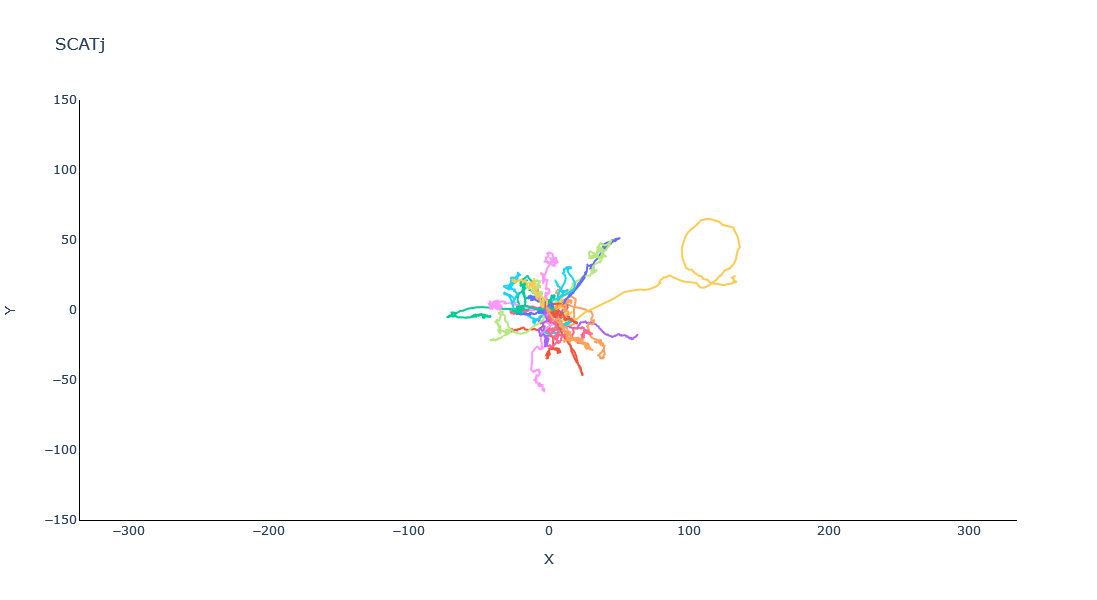

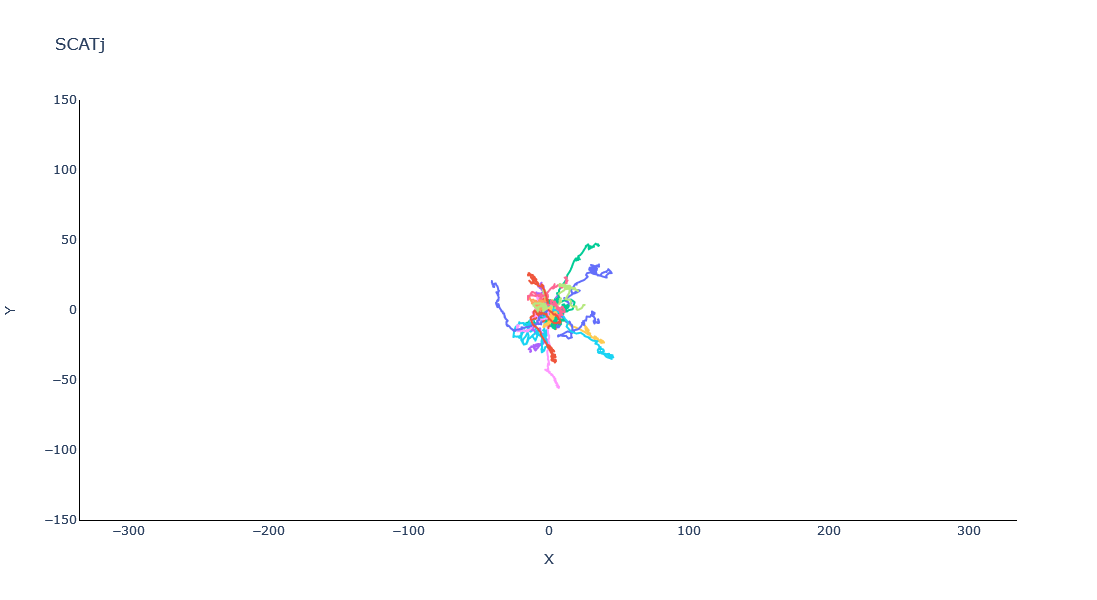

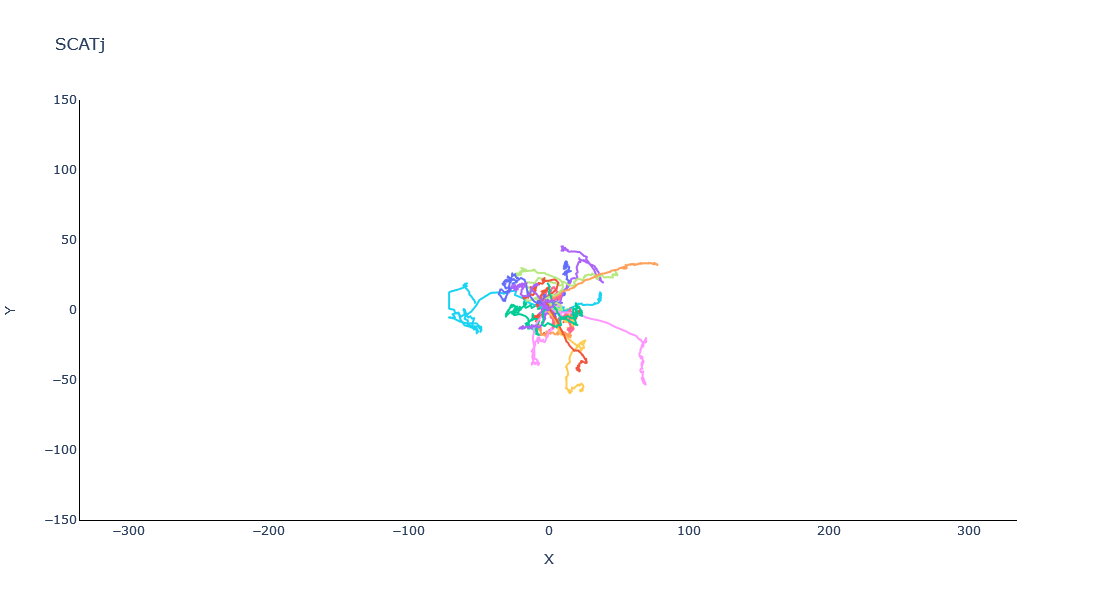

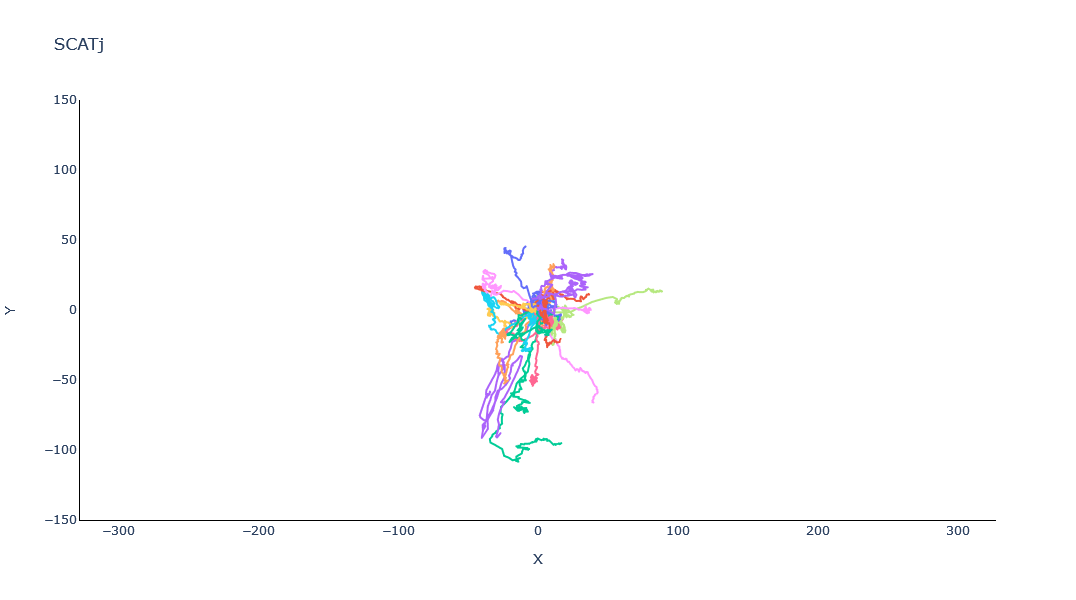

In [109]:
for i, j in zip(l,f):
    aff_t(i, 'SCATj', False)